# Lab session 1 ---- Linear Regression

Student: Nitinkumar ANAGHAN                
Date: 18/03/2018

In [92]:
#include libraries
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import numpy as np
from numpy import linalg

## I. Introduction
In this exercise, we will implement linear regression with one and multiple variables, as well as gradient descent.

## II. Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file lab1data1.txt contains the dataset: the first column is the poplulation of a city and the second column is the profit of a food truck in that city. An negative value for profit indicates a loss.

### Solution Question 1

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

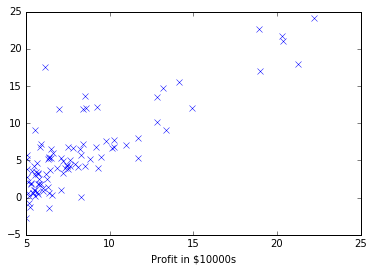

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
    
# loading data
data = np.loadtxt('lab1data1.txt', delimiter=',' )

#separating data
x=np.atleast_2d(data[:,:-1])
y=data[:,-1]
print(x)

#ploating dtaa
plt.plot(x,y,'bx', label='training')
plt.xlabel('Population of city in 10000s')
plt.xlabel('Profit in $10000s')
plt.show()

### Solution Question 2

[ 0.71726101 -0.01357131]
[-3.89578088  1.19303364]


/home/bhargav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


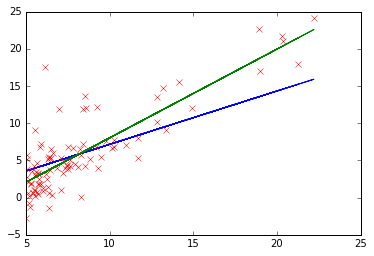

In [94]:
# Linear Regression
def linear_regression(x,y):
    
    length = len(x);
    A = sum(x*y)-sum(x)*sum(y)
    B = sum(x**2)-(sum(x))**2
    
    w1 = (length*A)/(length*B)
    w0 = np.mean(y)-w1*np.mean(x)
    
    w = [w1,w0]
    
    return w

#Plotting
wt = linear_regression(x,y)

w1, w0 = wt
yr = w0 + w1 * x

plt.plot(x,np.mean(yr, axis=1))
plt.plot(x,y,'rx')

intercept = np.ones((x.shape[0],1))
Xstack = np.asmatrix(np.hstack((intercept,x)))
wt2,_,_,_=np.linalg.lstsq(Xstack,y)
print(np.mean(wt, axis=1))
print(wt2)

yrtrue = wt2[1] * x + wt2[0]
plt.plot(x,yrtrue, 'g')    
plt.show()

### Solution Question 3

In [95]:
# Making Predictions

test = np.array ([3.5,7.0])
w = [1.19303364,-3.89578088]
def predict (wt2,y):
    y = np.vstack([y.flatten(),np.ones(len(y.flatten()))])
    predict = np.dot(wt2,y)
    return predict

prediction = predict(w,test)
print('The parameters estimated are : {}'.format(prediction*10000)) 

The parameters estimated are : [ 2798.3686 44554.546 ]


## III. Linear regression with multiple variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to collect information on recent houses sold and make a model of housing prices.
The file lab1data2.txt contains a training set of housing prices in a city. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.

### Solution Question 1

In [96]:
housedata = np.loadtxt("lab1data2.txt", delimiter= ",")
variables = housedata[:,0:2]
values = housedata[:,2]
print(housedata)

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

In [97]:
def LinearReg(x, y):
    #A = [1, x]
    A = x
    col0 = np.ones(A.shape[0])
    A = np.column_stack([col0, A])


    w = np.zeros(shape = [A.shape[1], ])

    #estimate parameters using linear least squares
    w = linalg.lstsq(A, y)[0]

    return (w)

w_woNormalization = LinearReg(variables, values)
print ('parameters from non-normalied features : ', w_woNormalization)


parameters from non-normalied features :  [89597.9095428    139.21067402 -8738.01911233]


/home/bhargav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


### Solution Question 2

In [98]:
def featureNormalize(x):

    x_normalized = np.zeros(shape = x.shape)
    

    mu = np.zeros(x.shape[1])
    sigma = np.zeros(x.shape[1])
    
    #for each column of x, xcol
    for col in range(0, x.shape[1]):
        colmean = x[:,col].mean()
        colstd = x[:,col].std()
        
        
        x_normalized[:,col] = (x[:,col] - colmean)/colstd
        mu[col] = colmean
        sigma[col] = colstd
        
            
    
    return x_normalized, mu, sigma

variables_n, mu, sigma = featureNormalize(variables)
print(variables_n,mu,sigma)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

### Solution Question 3

In [99]:
w_wNormalization = LinearReg(variables_n, values)
print ('parameters from normalized-features    : ', w_wNormalization)
print(w_wNormalization)

parameters from normalized-features    :  [340412.65957447 109447.79646964  -6578.35485416]
[340412.65957447 109447.79646964  -6578.35485416]


/home/bhargav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


### Solution Question 4

In [100]:
houseSize = 1650
test_nbedrooms = 3
testHouse = np.column_stack([1.0, houseSize, test_nbedrooms])
testHousePrice = np.dot(testHouse, w_woNormalization)
print ('price of test house using feature non-normalized model = $', testHousePrice)
print(testHouse)



price of test house using feature non-normalized model = $ [293081.4643349]
[[1.00e+00 1.65e+03 3.00e+00]]


## IV. Gradient descent
We will now perform linear regression using gradient descent.

### Solution Question 1

In [101]:
#function for gradient descent
def gradientDescent(x, y, w, alpha, Niter):

    x_a = np.column_stack([np.ones(shape = x.shape[0],), x])
    
   
    cost = np.zeros(Niter)
    
    iterCounter = 0;
    
    while (iterCounter < Niter):
        
        cost[iterCounter] = (0.50/x_a.shape[0])*np.sum( np.square(np.dot(x_a, w) - y) )
        
        
        for i in range(0, len(w)):
            #estimate gradient
            delWi = (1.0/ x_a.shape[0]) * np.sum ( np.multiply( (np.dot(x_a, w) - y), x_a[:,i] ) )
            #upgrade using estimated gradient
            w[i] = w[i] - alpha*delWi
    
    
        #increment the iterCounter
        iterCounter = iterCounter + 1
    
    #return the parameters and the evolution of costs over iterations
    return w, cost


### Solution Question 2

In [102]:
test_houseSize_n = (test_houseSize - mu[0])/sigma[0]
print(test_houseSize_n)
test_nbedrooms_n = (test_nbedrooms - mu[1])/sigma[1]
print(test_nbedrooms)
testHouse_n = np.column_stack([1.0, test_houseSize_n, test_nbedrooms_n])
testHousePrice_n = np.dot(testHouse_n, w_wNormalization)

print ('price of test house using feature normalized model = $', testHousePrice_n)


-0.4460438603276164
3
price of test house using feature normalized model = $ [293081.4643349]


### Solution Question 3

Gradient descent =  [280531.73523791]
For comparison  [293081.4643349]


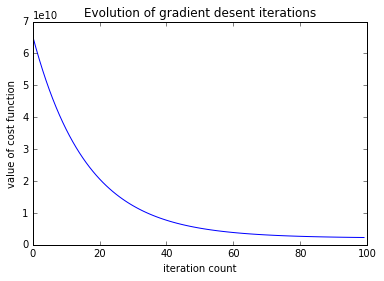

In [103]:
alpha = 0.03
nIter = 100
w_nGraDescent, cost = gradientDescent(variables_n, values, [0.0,0.0,0.0], alpha, nIter)


testHousePrice_nGraDescent = np.dot(House_n, w_nGraDescent)

print ('Gradient descent = ',testHousePrice_nGraDescent)
print ('For comparison ',testHousePrice_n)
plt.plot(range(0, nIter), cost)
plt.xlabel('iteration count')
plt.ylabel('value of cost function')
plt.title('Evolution of gradient desent iterations')
plt.show()